In [1]:
!python --version
#!pip install pandas-datareader
#!pip install yfinance
#!pip install matplotlib
#!pip install seaborn 
#!pip install nsepy
#!pip install statsmodels
#!pip uninstall numpy
#!pip install numpy==1.19.0
#pip install pmdarima

Python 3.8.2


### Let's load the ticker data for 5 differet market segments and NIFTY50
- Banking
- Realty
- IT
- Pharma
- FMCG

In [2]:
#!python3 -m pip install pandas_datareader

In [3]:
a = [1,2,3,4,5]
print(a[0])

1


In [4]:
import datetime as dtime
import nsepy
from nsepy import get_history as gh
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import numpy as np
import seaborn as sn
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

## Load Stock Price Data

In [5]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [6]:
ticker_list = ['Nifty 50','Nifty Bank','Nifty Auto','Nifty IT','NIFTY REALTY']

In [7]:
def getNSEData(start,end, ticker):
    nsepy.urls.index_history_url.url
    stk_data = gh(symbol=ticker,start=start,end=end, index=True)
    stk_data.reset_index(inplace=True)
    return stk_data
    

    
def writeData(data,writedir,filename):
    data.to_csv(writedir+'/'+filename +'.csv',index=False)

In [8]:
from datetime import date, timedelta
today = date.today()

In [5]:
start = dtime.datetime(2019,12,1)
enddate = today + timedelta(days=-1)
end = dtime.datetime(enddate.year, enddate.month, enddate.day)
for tick in ticker_list:
    stk_data = getNSEData(start,end,tick)
    writeData(stk_data,'./nse_ticker_data/',tick+'_'+str(today))

NameError: name 'getNSEData' is not defined

## Read stock prices loaded perviously

In [11]:
nsedf = pd.read_csv('./nse_ticker_data/Nifty 50_2021-08-01.csv', index_col=None, header=0)
nseauto = pd.read_csv('./nse_ticker_data/Nifty Auto_2021-08-01.csv', index_col=None, header=0)
nsebankdf = pd.read_csv('./nse_ticker_data/Nifty Bank_2021-08-01.csv', index_col=None, header=0)

nseitdf = pd.read_csv('./nse_ticker_data/Nifty IT_2021-08-01.csv', index_col=None, header=0)



### plotting the stocks data

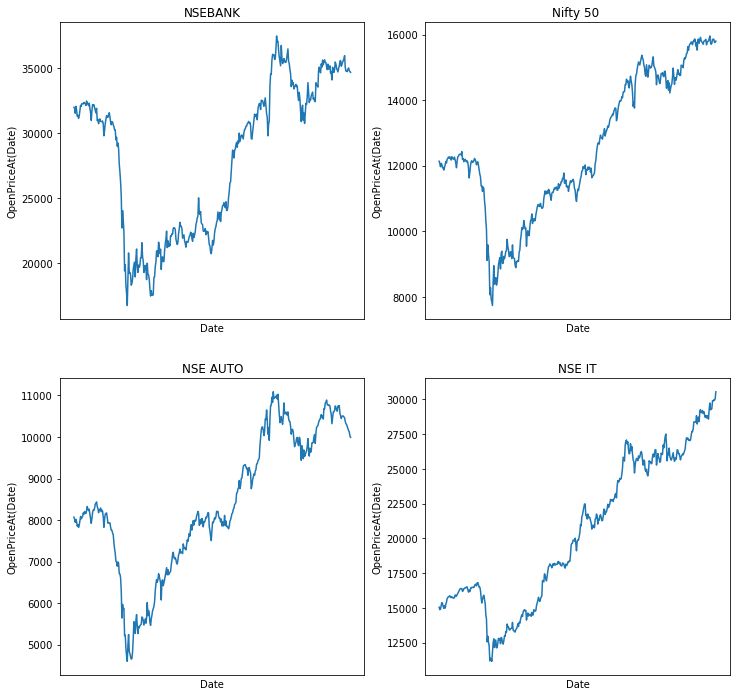

In [9]:
import matplotlib.dates as mdates
figure, axis = plt.subplots(2, 2,figsize=(12,12))

axis[0][0].plot(nsebankdf['Date'],nsebankdf['Open'])
axis[0][0].set_title('NSEBANK')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[0][0].set_xlabel('Date')
axis[0][0].set_ylabel('OpenPriceAt(Date)')
axis[0][0].xaxis.set_major_locator(mdates.DayLocator((1,15)))
axis[0][0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


axis[0][1].plot(nsedf['Date'],nsedf['Open'])
axis[0][1].set_title('Nifty 50 ')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[0][1].set_xlabel('Date')
axis[0][1].set_ylabel('OpenPriceAt(Date)')
axis[0][1].xaxis.set_major_locator(mdates.DayLocator((1,15)))
axis[0][1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


axis[1][0].plot(nseauto['Date'],nseauto['Open'])
axis[1][0].set_title('NSE AUTO')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[1][0].set_xlabel('Date')
axis[1][0].set_ylabel('OpenPriceAt(Date)')
axis[1][0].xaxis.set_major_locator(mdates.DayLocator((1,15)))
axis[1][0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


axis[1][1].plot(nseitdf['Date'],nseitdf['Open'])
axis[1][1].set_title('NSE IT')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[1][1].set_xlabel('Date')
axis[1][1].set_ylabel('OpenPriceAt(Date)')
axis[1][1].xaxis.set_major_locator(mdates.DayLocator((1,15)))
axis[1][1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')



#figure.autofmt_xdate()


### Common utility functions

In [13]:
def get_historic_dates(start_n_days,end_n_days):
    for n in range(start_n_days,end_n_days):
        yield today  + timedelta(days=-n)

def read_n_files(n,from_dir):
    all_files = glob.glob(from_dir + "/*.csv")
    ll = []
    if(len(all_files) > n):
        print('More files') 
        for i in range(0,n):
           
            df = pd.read_csv(all_files[i], index_col=None, header=0)
            ll.append(df)
    else:
        print('Less files')
        for filename in all_files:
            
            df = pd.read_csv(filename, index_col=None, header=0)
            ll.append(df)
    df1 = pd.concat(ll, axis=0, ignore_index=True)
    print(df1.head())
    
    return df1

In [2]:



yf.pdr_override()

# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
#ticker_list=['ONGC.NS','COALINDIA.NS','GRASIM.NS','DIVISLAB.NS','IOC.NS','SUNPHARMA.NS','DRREDDY.NS','BPCL.NS','WIPRO.NS','CIPLA.NS','SBILIFE.NS','POWERGRID.NS','BAJAJ-AUTO.NS','TATACONSUM.NS','INDUSINDBK.NS','TATASTEEL.NS','INFY.NS','NTPC.NS','BAJFINANCE.NS','BRITANNIA.NS','ITC.NS','BHARTIARTL.NS','HCLTECH.NS','AXISBANK.NS','NESTLEIND.NS','TITAN.NS','LT.NS','RELIANCE.NS','BAJAJFINSV.NS','HEROMOTOCO.NS','UPL.NS','HDFCLIFE.NS','EICHERMOT.NS','JSWSTEEL.NS','TECHM.NS','SHREECEM.NS','MARUTI.NS','SBIN.NS','ULTRACEMCO.NS','HINDALCO.NS','HINDUNILVR.NS','TCS.NS','ADANIPORTS.NS','M&M.NS','TATAMOTORS.NS','ASIANPAINT.NS','KOTAKBANK.NS','ICICIBANK.NS','HDFCBANK.NS','HDFC.NS']
ticker_list = ['^NSEBANK','^CNXREALTY','^CNXIT','^CNXPHARMA','^CNXFMCG','^NSEI']

# We can get data by our choice by giving days bracket
start_date= '2019–10–01'
end_date="2021–05-02"
files=[]
outdir = './ticker_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)


    
#read_n_files(7,outdir)

NameError: name 'yf' is not defined

In [ ]:
data = pdr.get_data_yahoo('^CNXIT', start=(today + timedelta(days=-100)), end=today + timedelta(days=-2))
data = data.reset_index()
data.head()

### Getting stocks data from yahoo finance API

In [6]:


def getData(ticker):
    print(ticker)
    data = pdr.get_data_yahoo(ticker, start=(today + timedelta(days=-550)), end=today + timedelta(days=-1))
    data =  data.reset_index()
    dataname = ticker +'_'+str(today)
    files.append(dataname)
    SaveData(data,outdir, dataname)


# Create a data folder in your current dir.
def SaveData(df,writedir, filename):
    df.to_csv(writedir+'/'+filename +'.csv',index=False)



### Get stock data from Yahoo finance API and store it

In [ ]:
# This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    getData(tik)

### Let's now load the covid cases data for India

In [ ]:
filen = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-08-2021.csv'

df = pd.read_csv(filen)

#df.col

df = df[df['Country_Region']=='India']
df[['Country_Region','Province_State','Incident_Rate','Case_Fatality_Ratio','Deaths','Recovered', 'Confirmed']].head()

In [ ]:
## Create covid data staging folder
covid_outdir = './covid_case_data'

if not os.path.exists(covid_outdir):
    os.mkdir(covid_outdir)
    

# Build the github data url for a date string
def build_covid_filename(datestr):
    return 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+datestr+'.csv'

def loadCovidData():
    allCovidDFs = []
    allCovidUniqColNames = set()
    # Next step does 3 things:
    #   1) Loop historic 500 days
    #   2) Build the url for each date
    #   3) Fetch the raw data from urls fabricated.
    for d in get_historic_dates(2,500):
        datestr = d.strftime('%m-%d-%Y')
        filename = build_covid_filename(datestr)
        df = pd.read_csv(filename)
        allCovidDFs.append(df)

        allCovidUniqColNames.update(set(df.columns))
        #df = pd.read_csv(filename,header=[1])
        cols = df.columns
        print(cols)


        if 'Country_Region' in cols:
            print('In country_regions')
            f = df[df['Country_Region']=='India']
        else:
            print('In country/regions')
            f = df[df['Country/Region']=='India']
            f['Country_Region'] = f['Country/Region']
            f.drop(['Country/Region'],inplace=True,axis=1)


        if 'Province/State' in cols:
            f['Province_State'] = f['Province/State']
            f.drop(['Province/State'],inplace=True,axis=1)

        if 'Case-Fatality_Ratio' in cols:
            f['Case_Fatality_Ratio'] = f['Case-Fatality_Ratio']
            f.drop(['Case-Fatality_Ratio'],inplace=True,axis=1)

        if 'Incidence_Rate' in cols:
            f['Incident_Rate'] = f['Incidence_Rate']
            f.drop(['Incidence_Rate'],inplace=True,axis=1)

        if ( ('Incident_Rate' not in cols) and ('Incidence_Rate' not in cols)) :
            f['Incident_Rate'] = 0

        if (('Case-Fatality_Ratio' not in cols) and ('Case_Fatality_Ratio' not in cols)) :
            f['Case_Fatality_Ratio'] = 0

        f = f[['Country_Region','Province_State','Incident_Rate','Case_Fatality_Ratio','Deaths','Recovered', 'Confirmed']]

        f['record_date'] = d
        SaveData(f,covid_outdir,datestr)


    print(allCovidUniqColNames)

In [ ]:
loadCovidData()

In [ ]:
nsebankdf = pd.read_csv('./ticker_data/^NSEBANK_2021-07-18.csv')
#nsebankdf.head()
nsedf = pd.read_csv('./ticker_data/^NSEI_2021-07-18.csv')
#nsedf.head()
cnxitdf = pd.read_csv('./ticker_data/^CNXIT_2021-07-18.csv')
cnxitdf.head()
realtydf = pd.read_csv('./ticker_data/^CNXREALTY_2021-07-18.csv')
realtydf.head()

### Getting stocks data from yahoo finance API

In [ ]:


def getData(ticker):
    print(ticker)
    data = pdr.get_data_yahoo(ticker, start=(today + timedelta(days=-550)), end=today + timedelta(days=-1))
    data =  data.reset_index()
    dataname = ticker +'_'+str(today)
    files.append(dataname)
    SaveData(data,outdir, dataname)


# Create a data folder in your current dir.
def SaveData(df,writedir, filename):
    df.to_csv(writedir+'/'+filename +'.csv',index=False)



### Get stock data from Yahoo finance API and store it

In [24]:
# This loop will iterate over ticker list, will pass one ticker to get data, and save that data as file.
for tik in ticker_list:
    getData(tik)

^NSEBANK
[*********************100%***********************]  1 of 1 completed
^CNXREALTY
[*********************100%***********************]  1 of 1 completed
^CNXIT
[*********************100%***********************]  1 of 1 completed
^CNXPHARMA
[*********************100%***********************]  1 of 1 completed
^CNXFMCG
[*********************100%***********************]  1 of 1 completed
^NSEI
[*********************100%***********************]  1 of 1 completed


### Let's now load the covid cases data for India

In [10]:
filen = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-08-2021.csv'

df = pd.read_csv(filen)

#df.col

df = df[df['Country_Region']=='India']
df[['Country_Region','Province_State','Incident_Rate','Case_Fatality_Ratio','Deaths','Recovered', 'Confirmed']].head()

,Country_Region,Province_State,Incident_Rate,Case_Fatality_Ratio,Deaths,Recovered,Confirmed
248,India,Andaman and Nicobar Islands,1188.866189,1.250504,62,4864,4958
249,India,Andhra Pradesh,1640.288210,0.805953,7126,874223,884171
250,India,Arunachal Pradesh,1067.013572,0.334189,56,16622,16757
251,India,Assam,607.972485,0.489188,1059,212376,216481
252,India,Bihar,203.883935,0.559645,1424,248762,254447


In [7]:
## Create covid data staging folder
covid_outdir = './covid_case_data'

if not os.path.exists(covid_outdir):
    os.mkdir(covid_outdir)
    

# Build the github data url for a date string
def build_covid_filename(datestr):
    return 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+datestr+'.csv'

def loadCovidData():
    allCovidDFs = []
    allCovidUniqColNames = set()
    # Next step does 3 things:
    #   1) Loop historic 500 days
    #   2) Build the url for each date
    #   3) Fetch the raw data from urls fabricated.
    for d in get_historic_dates(2,500):
        datestr = d.strftime('%m-%d-%Y')
        filename = build_covid_filename(datestr)
        df = pd.read_csv(filename)
        allCovidDFs.append(df)

        allCovidUniqColNames.update(set(df.columns))
        #df = pd.read_csv(filename,header=[1])
        cols = df.columns
        print(cols)


        if 'Country_Region' in cols:
            print('In country_regions')
            f = df[df['Country_Region']=='India']
        else:
            print('In country/regions')
            f = df[df['Country/Region']=='India']
            f['Country_Region'] = f['Country/Region']
            f.drop(['Country/Region'],inplace=True,axis=1)


        if 'Province/State' in cols:
            f['Province_State'] = f['Province/State']
            f.drop(['Province/State'],inplace=True,axis=1)

        if 'Case-Fatality_Ratio' in cols:
            f['Case_Fatality_Ratio'] = f['Case-Fatality_Ratio']
            f.drop(['Case-Fatality_Ratio'],inplace=True,axis=1)

        if 'Incidence_Rate' in cols:
            f['Incident_Rate'] = f['Incidence_Rate']
            f.drop(['Incidence_Rate'],inplace=True,axis=1)

        if ( ('Incident_Rate' not in cols) and ('Incidence_Rate' not in cols)) :
            f['Incident_Rate'] = 0

        if (('Case-Fatality_Ratio' not in cols) and ('Case_Fatality_Ratio' not in cols)) :
            f['Case_Fatality_Ratio'] = 0

        f = f[['Country_Region','Province_State','Incident_Rate','Case_Fatality_Ratio','Deaths','Recovered', 'Confirmed']]

        f['record_date'] = d
        SaveData(f,covid_outdir,datestr)


    print(allCovidUniqColNames)

In [ ]:
loadCovidData()

In [49]:
nsebankdf = pd.read_csv('./ticker_data/^NSEBANK_2021-07-18.csv')
#nsebankdf.head()
nsedf = pd.read_csv('./ticker_data/^NSEI_2021-07-18.csv')
#nsedf.head()
cnxitdf = pd.read_csv('./ticker_data/^CNXIT_2021-07-18.csv')
cnxitdf.head()
realtydf = pd.read_csv('./ticker_data/^CNXREALTY_2021-07-18.csv')
realtydf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-16,395.450012,402.100006,390.049988,397.549988,397.549988,0


#### Let's test the linearity in the price

Text(0, 0.5, 'OpenPriceAt(t+2)')

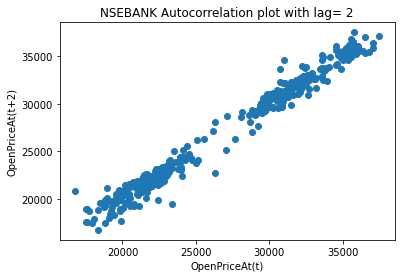

In [16]:
plt.figure()
lag_plot(df['Open'],lag=2)
plt.title('NSEBANK Autocorrelation plot with lag= 2')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
plt.xlabel('OpenPriceAt(t)')
plt.ylabel('OpenPriceAt(t+2)')

Text(0, 0.5, 'OpenPriceAt(t+2)')

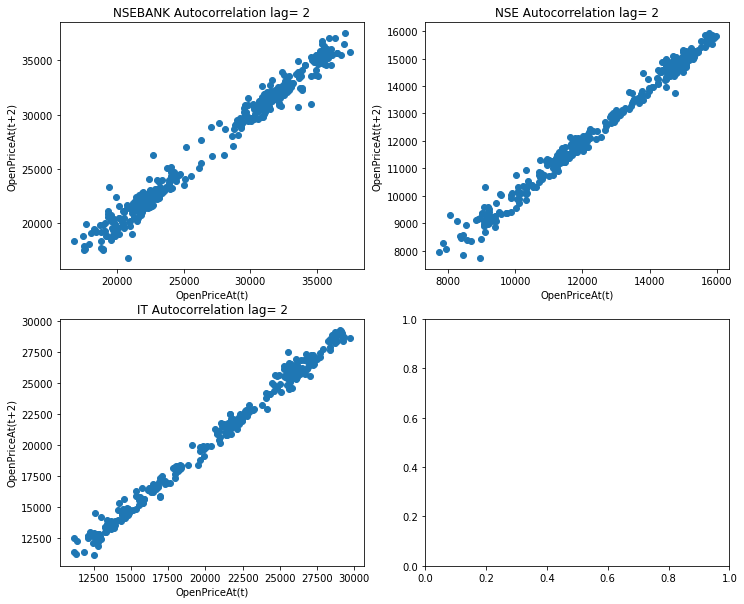

In [48]:
figure, axis = plt.subplots(2, 2,figsize=(12,10))

axis[0][0].scatter(nsebankdf['Open'],nsebankdf['Open'].shift(2))
axis[0][0].set_title('NSEBANK Autocorrelation lag= 2')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[0][0].set_xlabel('OpenPriceAt(t)')
axis[0][0].set_ylabel('OpenPriceAt(t+2)')

axis[0][1].scatter(nsedf['Open'],nsedf['Open'].shift(2))
axis[0][1].set_title('NSE Autocorrelation lag= 2')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[0][1].set_xlabel('OpenPriceAt(t)')
axis[0][1].set_ylabel('OpenPriceAt(t+2)')


axis[1][0].scatter(cnxitdf['Open'],cnxitdf['Open'].shift(2))
axis[1][0].set_title('IT Autocorrelation lag= 2')
#plt.title('NIFTY50 Autocorrelation plot with lag= 1')
axis[1][0].set_xlabel('OpenPriceAt(t)')
axis[1][0].set_ylabel('OpenPriceAt(t+2)')


In [14]:
len(df['Close'])

403

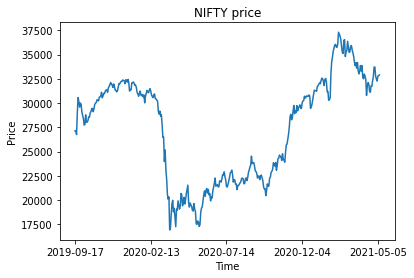

In [15]:
plt.plot(df['Date'],df['Close'])
plt.xticks(np.arange(0,500,100),df['Date'][0:500:100])
plt.title('NIFTY price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [16]:
covid_df = read_n_files(500,covid_outdir)
covid_df.head()

More files
  Country_Region  Incident_Rate Case_Fatality_Ratio   Deaths  Recovered  \
0          India    1658.609808            1.575828    109.0     6591.0   
1          India    3049.078933            0.640744  10531.0  1446244.0   
2          India    1644.106369            0.422153    109.0    22019.0   
3          India    1102.517960            0.786603   3088.0   334418.0   
4          India     561.616519            0.705239   4943.0   667506.0   

   Confirmed record_date  Unnamed: 0  
0       6917  2021-05-27         NaN  
1    1643557  2021-05-27         NaN  
2      25820  2021-05-27         NaN  
3     392574  2021-05-27         NaN  
4     700897  2021-05-27         NaN  


,Country_Region,Incident_Rate,Case_Fatality_Ratio,Deaths,Recovered,Confirmed,record_date,Unnamed: 0
0,India,1658.609808,1.575828,109.0,6591.0,6917,2021-05-27,NaN
1,India,3049.078933,0.640744,10531.0,1446244.0,1643557,2021-05-27,NaN
2,India,1644.106369,0.422153,109.0,22019.0,25820,2021-05-27,NaN
3,India,1102.517960,0.786603,3088.0,334418.0,392574,2021-05-27,NaN
4,India,561.616519,0.705239,4943.0,667506.0,700897,2021-05-27,NaN


In [22]:
covid_df.columns

Index(['Unnamed: 0', 'Country_Region', 'Incident_Rate', 'Case_Fatality_Ratio',
       'Deaths', 'Recovered', 'Confirmed', 'record_date'],
      dtype='object')

In [23]:
covid_sum = covid_df.groupby(['record_date']).sum().reset_index()

In [24]:
covid_sum.head(150)

,record_date,Unnamed: 0,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,54,0.000000,0.0,0.0,1
1,2020-02-02,47,0.000000,0.0,0.0,2
2,2020-02-03,45,0.000000,0.0,0.0,3
3,2020-02-04,45,0.000000,0.0,0.0,3
4,2020-02-05,45,0.000000,0.0,0.0,3
...,...,...,...,...,...,...
145,2020-06-25,120580,1614.381385,15301.0,285637.0,490401
146,2020-06-26,120616,1667.250626,15685.0,295881.0,508953
147,2020-06-27,120652,1731.077617,16095.0,309713.0,528859
148,2020-06-28,120652,1782.501092,16475.0,321723.0,548318


In [25]:
covid_sum.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
covid_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   record_date    468 non-null    object 
 1   Incident_Rate  468 non-null    float64
 2   Deaths         468 non-null    float64
 3   Recovered      468 non-null    float64
 4   Confirmed      468 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 18.4+ KB


In [28]:
!mkdir clean_covid

In [31]:
SaveData(covid_sum,'./clean_covid','clean_covid')

In [9]:
covid_df = pd.read_csv('./clean_covid/clean_covid.csv', index_col=None, header=0)
covid_df.head()

,record_date,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,0.0,0.0,0.0,1
1,2020-02-02,0.0,0.0,0.0,2
2,2020-02-03,0.0,0.0,0.0,3
3,2020-02-05,0.0,0.0,0.0,3
4,2020-02-06,0.0,0.0,0.0,3


In [10]:
stock_df = pd.read_csv('./nse_ticker_data/Nifty 50_2021-08-01.csv', index_col=None, header=0)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2019-12-02,12137.05,12137.15,12023.70,12048.2,720945335,2.311318e+11
1,2019-12-03,12067.65,12068.60,11956.40,11994.2,605789334,1.820376e+11
2,2019-12-04,11969.95,12054.70,11935.30,12043.2,747193818,2.213283e+11
3,2019-12-05,12071.25,12081.20,11998.75,12018.4,562228745,1.958981e+11
4,2019-12-06,12047.35,12057.05,11888.85,11921.5,609221205,1.824549e+11


In [11]:
#stock_df = pd.read_csv('./ticker_data/^NSEI_2021-07-18.csv', index_col=None, header=0)
#stock_df.head()

In [12]:
covid_df.count

<bound method DataFrame.count of     record_date  Incident_Rate    Deaths   Recovered  Confirmed
0    2020-02-01       0.000000       0.0         0.0          1
1    2020-02-02       0.000000       0.0         0.0          2
2    2020-02-03       0.000000       0.0         0.0          3
3    2020-02-05       0.000000       0.0         0.0          3
4    2020-02-06       0.000000       0.0         0.0          3
..          ...            ...       ...         ...        ...
495  2021-07-04  124415.063028  402728.0  29700430.0   30585229
496  2021-07-05  124677.890921  403281.0  29752294.0   30619932
497  2021-07-06  124938.772443  404211.0  29799534.0   30663665
498  2021-07-07  125228.198898  405028.0  29843825.0   30709557
499  2021-07-08  125504.673739  405939.0  29888284.0   30752950

[500 rows x 5 columns]>

In [13]:
data = pd.merge(stock_df,covid_df,left_on='Date',right_on='record_date',how='inner')
data[['Date', 'Open','Close','Confirmed','Deaths']].tail()

,Date,Open,Close,Confirmed,Deaths
334,2021-07-02,15705.85,15722.20,30502362,401050.0
335,2021-07-05,15793.40,15834.35,30619932,403281.0
336,2021-07-06,15813.75,15818.25,30663665,404211.0
337,2021-07-07,15819.60,15879.65,30709557,405028.0
338,2021-07-08,15855.40,15727.90,30752950,405939.0


In [14]:
data.fillna(0.0)

,Date,Open,High,Low,Close,Volume,Turnover,record_date,Incident_Rate,Deaths,Recovered,Confirmed
0,2020-02-01,11939.00,12017.35,11633.30,11661.85,537634767,2.059812e+11,2020-02-01,0.000000,0.0,0.0,1
1,2020-02-03,11627.45,11749.85,11614.50,11707.90,669815788,2.541526e+11,2020-02-03,0.000000,0.0,0.0,3
2,2020-02-05,12005.85,12098.15,11953.35,12089.15,758032580,2.299805e+11,2020-02-05,0.000000,0.0,0.0,3
3,2020-02-06,12120.00,12160.60,12084.65,12137.95,565116236,2.173592e+11,2020-02-06,0.000000,0.0,0.0,3
4,2020-02-07,12151.15,12154.70,12073.95,12098.35,473475144,1.633961e+11,2020-02-07,0.000000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
334,2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,2021-07-02,123911.048197,401050.0,29605779.0,30502362
335,2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,2021-07-05,124677.890921,403281.0,29752294.0,30619932
336,2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,2.445605e+11,2021-07-06,124938.772443,404211.0,29799534.0,30663665
337,2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,2.225996e+11,2021-07-07,125228.198898,405028.0,29843825.0,30709557


In [15]:
corr = data.corr()

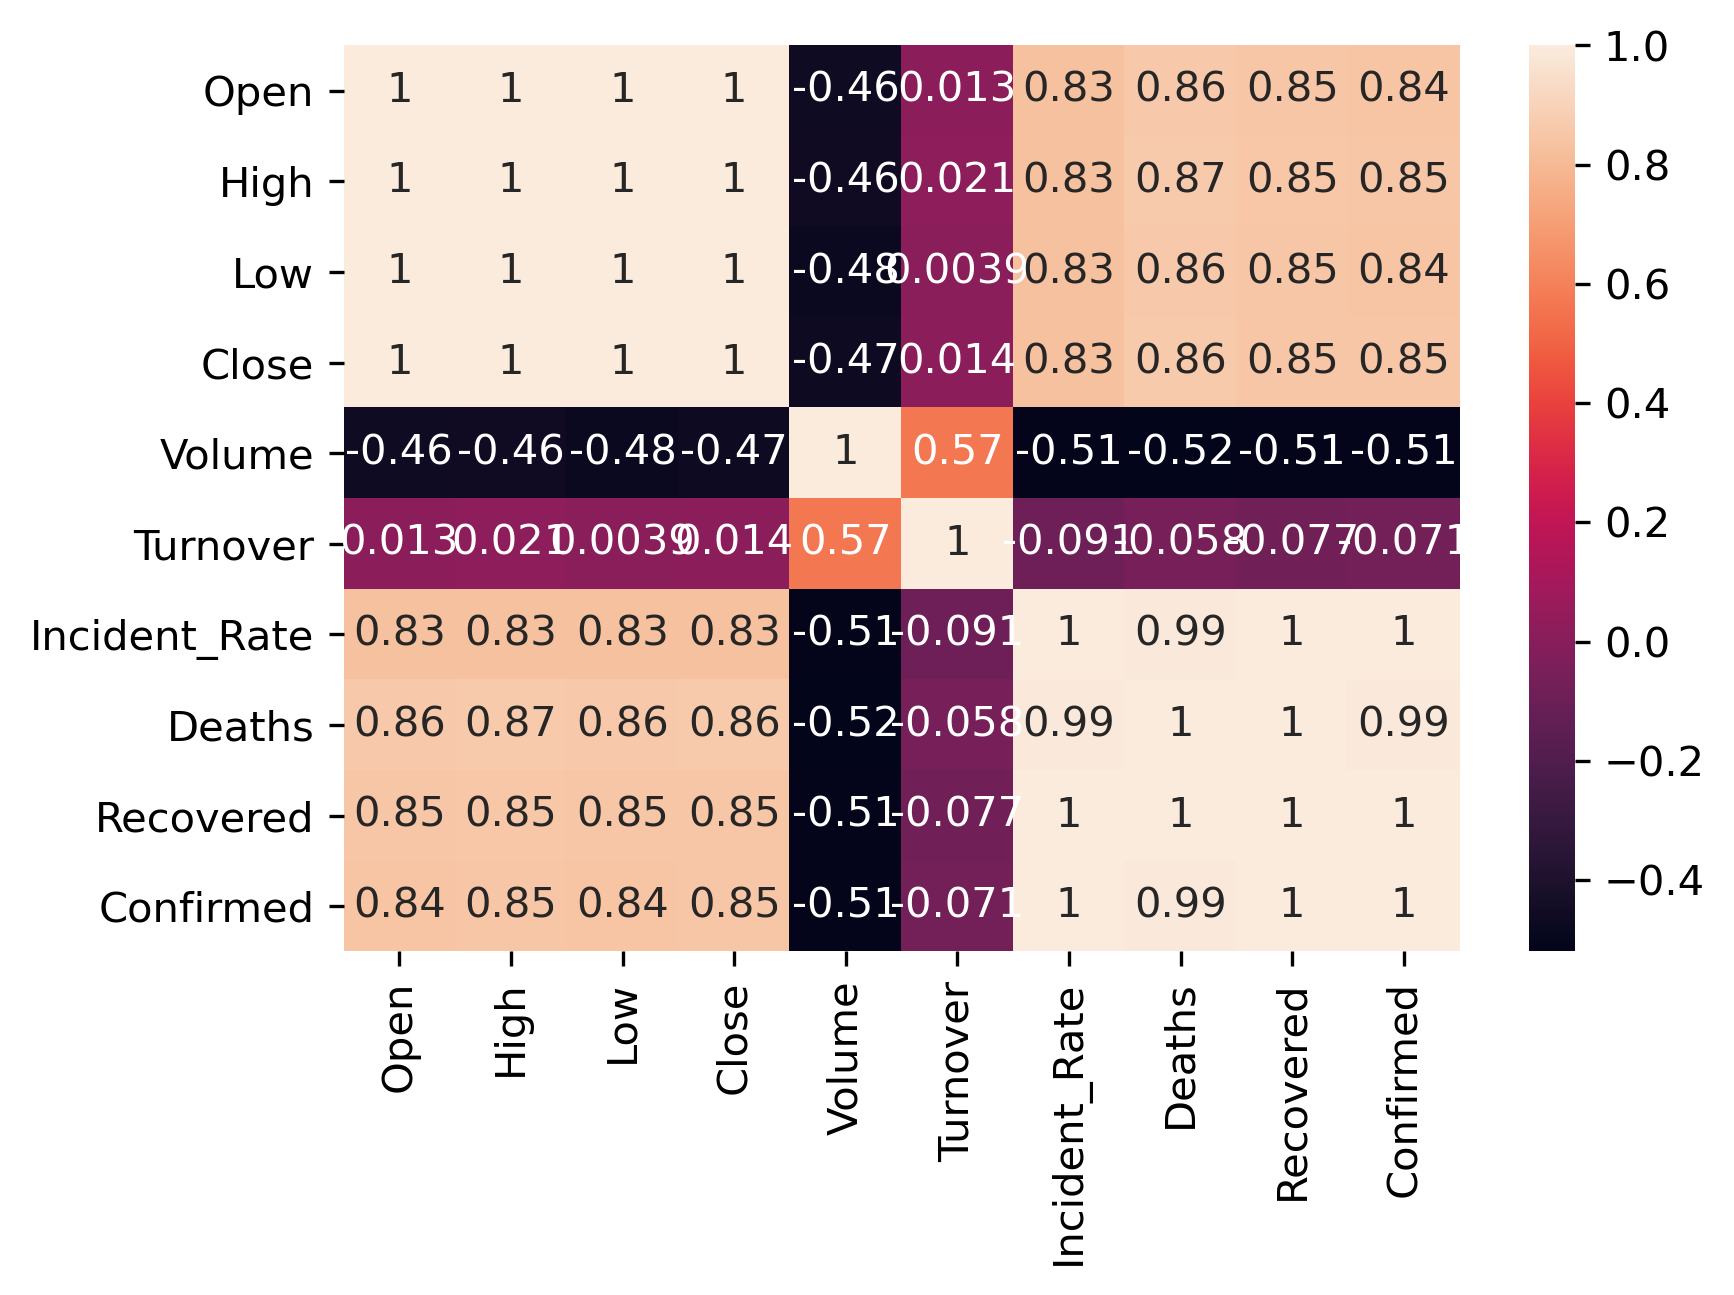

In [16]:
sn.heatmap(corr, annot=True)

In [17]:
data_2 = data[['Close','Deaths','Confirmed']]


In [18]:
train_set =  data_2.values
train_set.shape


(339, 3)

In [19]:
y_unscaled = train_set[:,0]


In [20]:
y_unscaled.shape
print(y_unscaled[:10])

[11661.85 11707.9  12089.15 12137.95 12098.35 12031.5  12107.9  12201.2
 12174.65 12113.45]


### Scaling the data

In [21]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)

print(training_set_scaled[0])

[0.4899509 0.        0.       ]


In [22]:
lag_window = 30

In [23]:
def create_timesteps_features(lag_window):
    X_train = []
    y_train = []
    for i in range(lag_window, train_set.shape[0]):
        X_train.append(training_set_scaled[i-lag_window:i])
        y_train.append(training_set_scaled[i, 0]) 
    X_train, y_train = np.array(X_train), np.array(y_train)
    #np.expand_dims(X_train,)
    print(X_train.shape)
    #X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[2], 1))
    print(X_train[100])
    print(y_train[100])
    return X_train, y_train

In [24]:
X_train_sc,y_train_sc = create_timesteps_features(30)

(309, 30, 3)
[[0.37433187 0.05204969 0.02495029]
 [0.38735579 0.05321982 0.02581219]
 [0.38186567 0.05449834 0.02669386]
 [0.38605582 0.05844967 0.02948501]
 [0.36243258 0.05988338 0.03044196]
 [0.36374465 0.06137375 0.03150449]
 [0.3784676  0.06306859 0.03264178]
 [0.39802767 0.06472155 0.03378808]
 [0.41259946 0.06917788 0.03756833]
 [0.4295354  0.07077911 0.03879553]
 [0.42594989 0.07356031 0.04028222]
 [0.43596875 0.07538325 0.04188564]
 [0.43339299 0.07724806 0.04347625]
 [0.42585315 0.08229808 0.04812781]
 [0.4462597  0.08233996 0.04822806]
 [0.43444506 0.086109   0.05144099]
 [0.42226764 0.08798859 0.05315734]
 [0.41879701 0.08994208 0.05514876]
 [0.42143324 0.09803197 0.06205106]
 [0.42220717 0.10025891 0.06388119]
 [0.43411856 0.1024415  0.06591475]
 [0.43579945 0.10473987 0.06791576]
 [0.4425835  0.11148719 0.07377094]
 [0.44891407 0.11354169 0.07575329]
 [0.44720899 0.11586224 0.07793191]
 [0.44624761 0.1183429  0.08003099]
 [0.43148838 0.12079647 0.0821359 ]
 [0.43979612 0.

In [27]:
def do_test_train_split_unscaled(unscaled_full, test_size,lag_window):
    unscaled_full_l = unscaled_full[lag_window:]
    y_train_unscaled = unscaled_full_l[:unscaled_full.shape[0]-test_size]
    y_test_unscaled = unscaled_full_l[unscaled_full.shape[0]-test_size:]
    return y_train_unscaled, y_test_unscaled
    

In [28]:
y_train_unscaled, y_test_unscaled = do_test_train_split_unscaled(y_unscaled,80,30)

In [33]:
def scaled_split(X_train,y_train,test_size):
    X_test = X_train[X_train.shape[0]-test_size:]
    X_train_n = X_train[:X_train.shape[0]-test_size]
    y_test = y_train[X_train.shape[0]-test_size:]
    y_train_n = y_train[:X_train.shape[0]-test_size]
    return X_test, y_test,X_train_n,y_train_n

In [49]:
X_test, y_test,X_train_n,y_train_n = scaled_split(X_train_sc,y_train_sc,80)

In [63]:
def train_model(X_train_n = X_train_n , y_train_n = y_train_n ,validation_data=(X_test, y_test), epochs, batch_size):
    
    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = True,input_shape = (X_train_n.shape[1],X_train_n.shape[2])))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=["mae","accuracy","mse"])
    regressor.fit(X_train_n, y_train_n,validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size )
    return regressor

In [78]:
regressor = train_model(X_train_n,y_train_n,[X_test, y_test],50,20)

Epoch 1/50
12/12 [==============================] - 2s 208ms/step - loss: 0.0977 - mae: 0.2459 - accuracy: 0.0000e+00 - mse: 0.0977 - val_loss: 0.0175 - val_mae: 0.1295 - val_accuracy: 0.0125 - val_mse: 0.0175
Epoch 2/50
12/12 [==============================] - 1s 42ms/step - loss: 0.0202 - mae: 0.1092 - accuracy: 0.0044 - mse: 0.0202 - val_loss: 0.0155 - val_mae: 0.1200 - val_accuracy: 0.0125 - val_mse: 0.0155
Epoch 3/50
12/12 [==============================] - 0s 39ms/step - loss: 0.0145 - mae: 0.0934 - accuracy: 0.0044 - mse: 0.0145 - val_loss: 0.0078 - val_mae: 0.0781 - val_accuracy: 0.0125 - val_mse: 0.0078
Epoch 4/50
12/12 [==============================] - 0s 39ms/step - loss: 0.0102 - mae: 0.0776 - accuracy: 0.0044 - mse: 0.0102 - val_loss: 0.0025 - val_mae: 0.0404 - val_accuracy: 0.0125 - val_mse: 0.0025
Epoch 5/50
12/12 [==============================] - 1s 42ms/step - loss: 0.0122 - mae: 0.0893 - accuracy: 0.0044 - mse: 0.0122 - val_loss: 0.0138 - val_mae: 0.1086 - val_accur

Epoch 41/50
12/12 [==============================] - 1s 43ms/step - loss: 0.0048 - mae: 0.0548 - accuracy: 0.0044 - mse: 0.0048 - val_loss: 0.0039 - val_mae: 0.0516 - val_accuracy: 0.0125 - val_mse: 0.0039
Epoch 42/50
12/12 [==============================] - 1s 47ms/step - loss: 0.0070 - mae: 0.0672 - accuracy: 0.0044 - mse: 0.0070 - val_loss: 0.0069 - val_mae: 0.0736 - val_accuracy: 0.0125 - val_mse: 0.0069
Epoch 43/50
12/12 [==============================] - 1s 43ms/step - loss: 0.0059 - mae: 0.0597 - accuracy: 0.0044 - mse: 0.0059 - val_loss: 0.0167 - val_mae: 0.1256 - val_accuracy: 0.0125 - val_mse: 0.0167
Epoch 44/50
12/12 [==============================] - 1s 42ms/step - loss: 0.0055 - mae: 0.0565 - accuracy: 0.0044 - mse: 0.0055 - val_loss: 0.0098 - val_mae: 0.0902 - val_accuracy: 0.0125 - val_mse: 0.0098
Epoch 45/50
12/12 [==============================] - 1s 45ms/step - loss: 0.0050 - mae: 0.0565 - accuracy: 0.0044 - mse: 0.0050 - val_loss: 0.0058 - val_mae: 0.0644 - val_accur

In [79]:
hist = pd.DataFrame(regressor.history.history)
hist['epoch'] = regressor.history.epoch
hist.tail()

,loss,mae,accuracy,mse,val_loss,val_mae,val_accuracy,val_mse,epoch
45,0.004830,0.054793,0.004367,0.004830,0.006013,0.067609,0.0125,0.006013,45
46,0.005621,0.059348,0.004367,0.005621,0.003606,0.049064,0.0125,0.003606,46
47,0.004140,0.050552,0.004367,0.004140,0.001767,0.034691,0.0125,0.001767,47
48,0.004293,0.051111,0.004367,0.004293,0.001794,0.034436,0.0125,0.001794,48
49,0.003449,0.046282,0.004367,0.003449,0.000633,0.021049,0.0125,0.000633,49


In [80]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['mae'], label='mae')
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(history.history['val_mae'], label='val_mae')
  plt.plot(history.history['val_mse'], label='val_mse')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

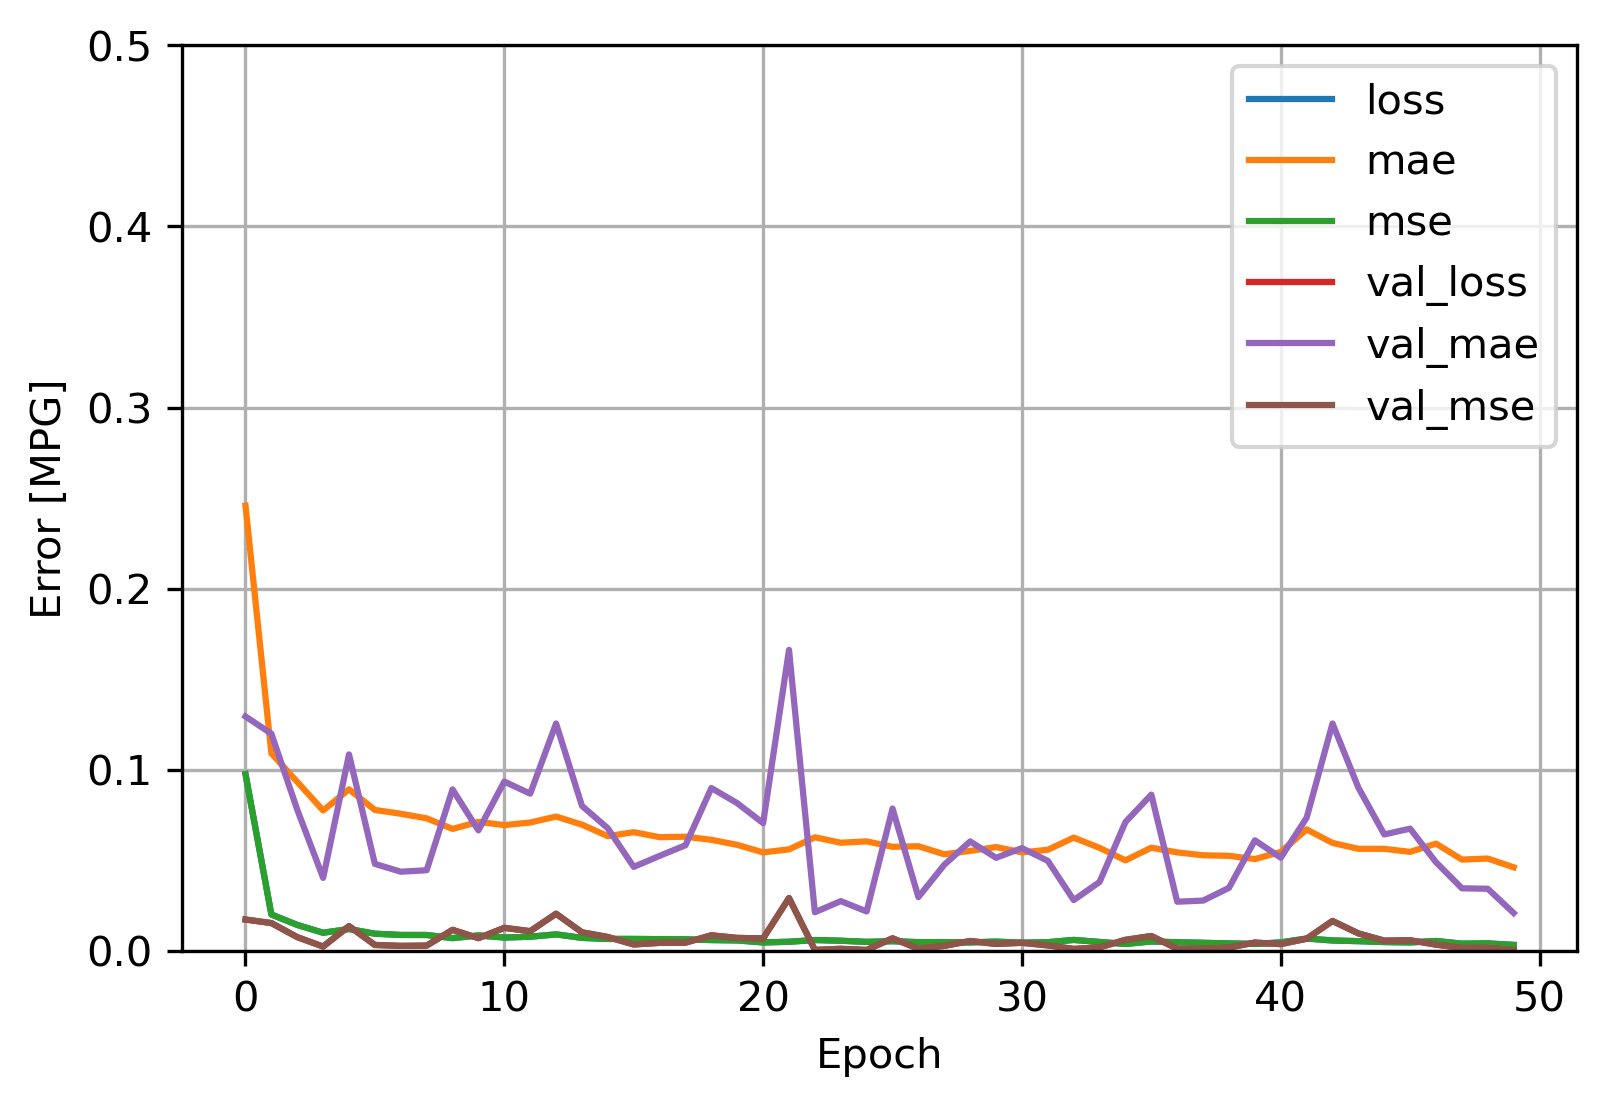

In [81]:
plot_loss(regressor.history)

In [82]:
X_test.shape

(80, 30, 3)

In [83]:
y_pred_sc = regressor.predict(X_test)
y_pred_sc.shape

(80, 1)

In [84]:
unsc = train_set[len(train_set)-80:]
unsc[:,0] = y_pred_sc[0]

In [85]:
unc = sc.inverse_transform(unsc)
y_pred_unscaled = unc[:,0]

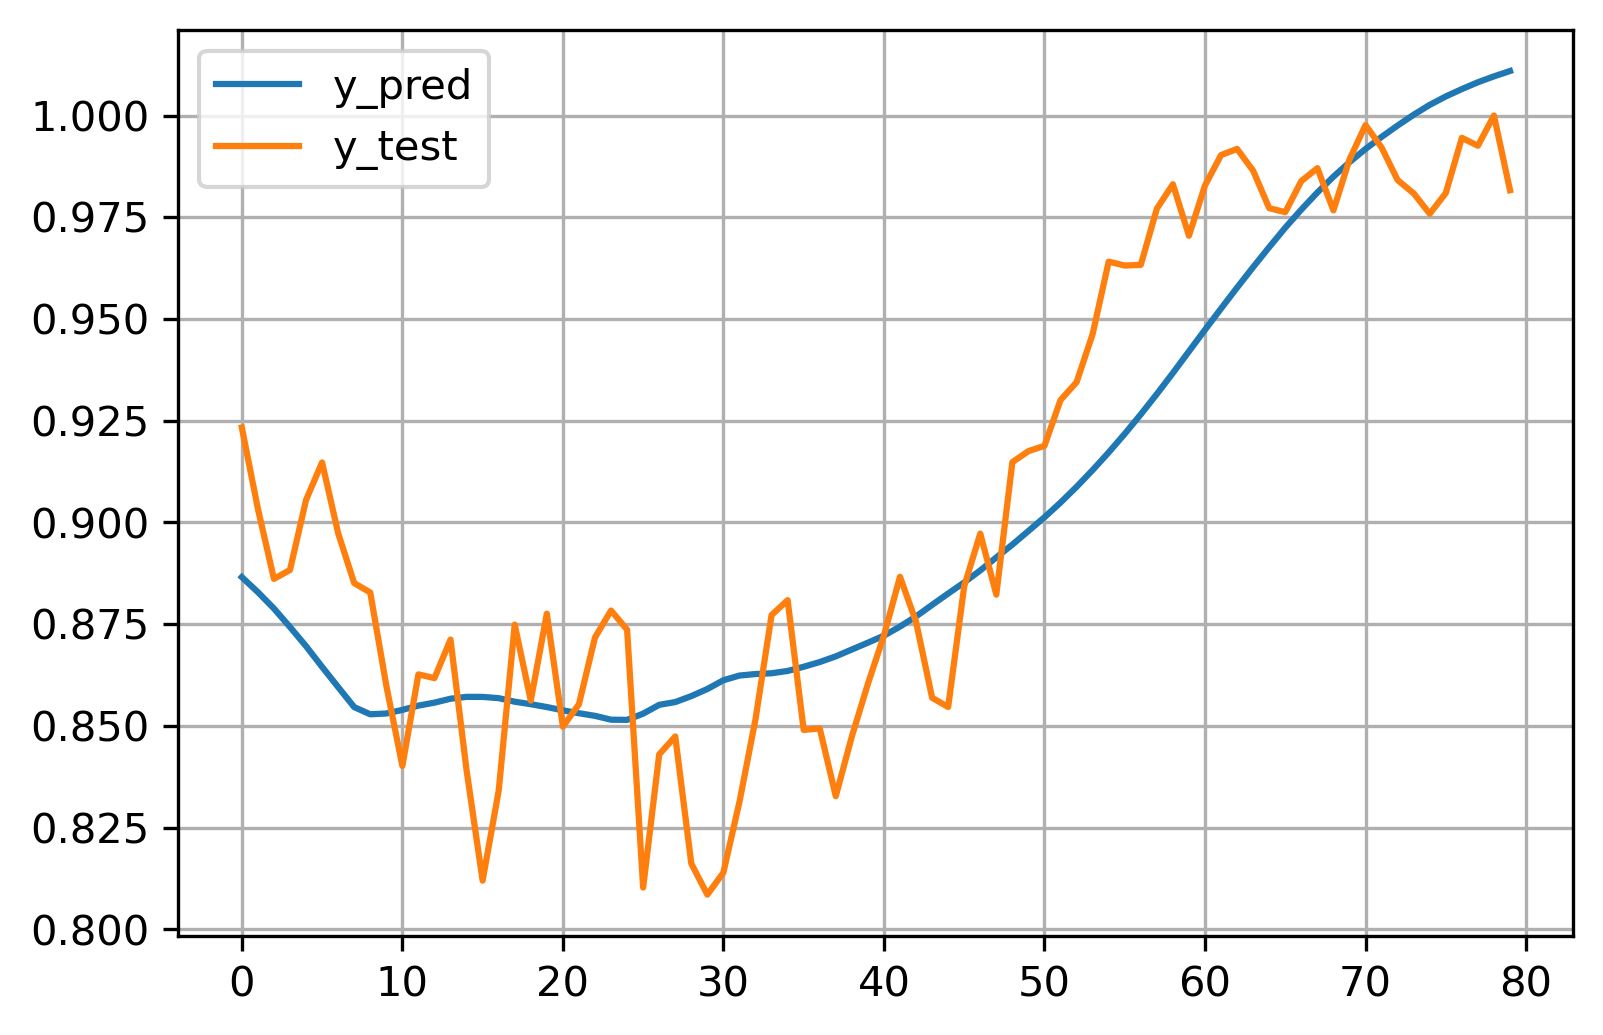

In [86]:
  plt.plot(y_pred_sc.flatten(), label='y_pred')
  plt.plot(y_test, label='y_test')
  plt.legend()
  plt.grid(True)

In [87]:
len(y_test)

80

In [88]:
y_pred_sc = y_pred_sc.flatten()
res_test = y_pred_sc - y_test
res_test

array([-3.67505332e-02, -2.05084577e-02, -7.28273786e-03, -1.40195435e-02,
       -3.59157737e-02, -5.02514476e-02, -3.78185531e-02, -3.04708552e-02,
       -2.99325517e-02, -6.86558968e-03,  1.37865522e-02, -7.67337962e-03,
       -6.02351611e-03, -1.45350545e-02,  1.80130951e-02,  4.51508863e-02,
        2.27823482e-02, -1.89357861e-02, -8.79064145e-04, -2.29401746e-02,
        4.00459270e-03, -2.23157793e-03, -1.92646219e-02, -2.68312231e-02,
       -2.21629890e-02,  4.27389556e-02,  1.21734470e-02,  8.45772609e-03,
        4.11676202e-02,  5.05374586e-02,  4.72549140e-02,  3.10349650e-02,
        1.10849287e-02, -1.42995440e-02, -1.74004771e-02,  1.55290416e-02,
        1.63199395e-02,  3.43617054e-02,  2.13751851e-02,  1.01136929e-02,
       -5.49513019e-05, -1.22319817e-02,  1.33599826e-03,  2.28290278e-02,
        2.78795166e-02,  9.36446125e-04, -9.05102313e-03,  9.15211266e-03,
       -2.02554945e-02, -1.96231379e-02, -1.75463293e-02, -2.51848013e-02,
       -2.57156672e-02, -

In [89]:
# Predict the train data
y_pred_train = regressor.predict(X_train_sc)

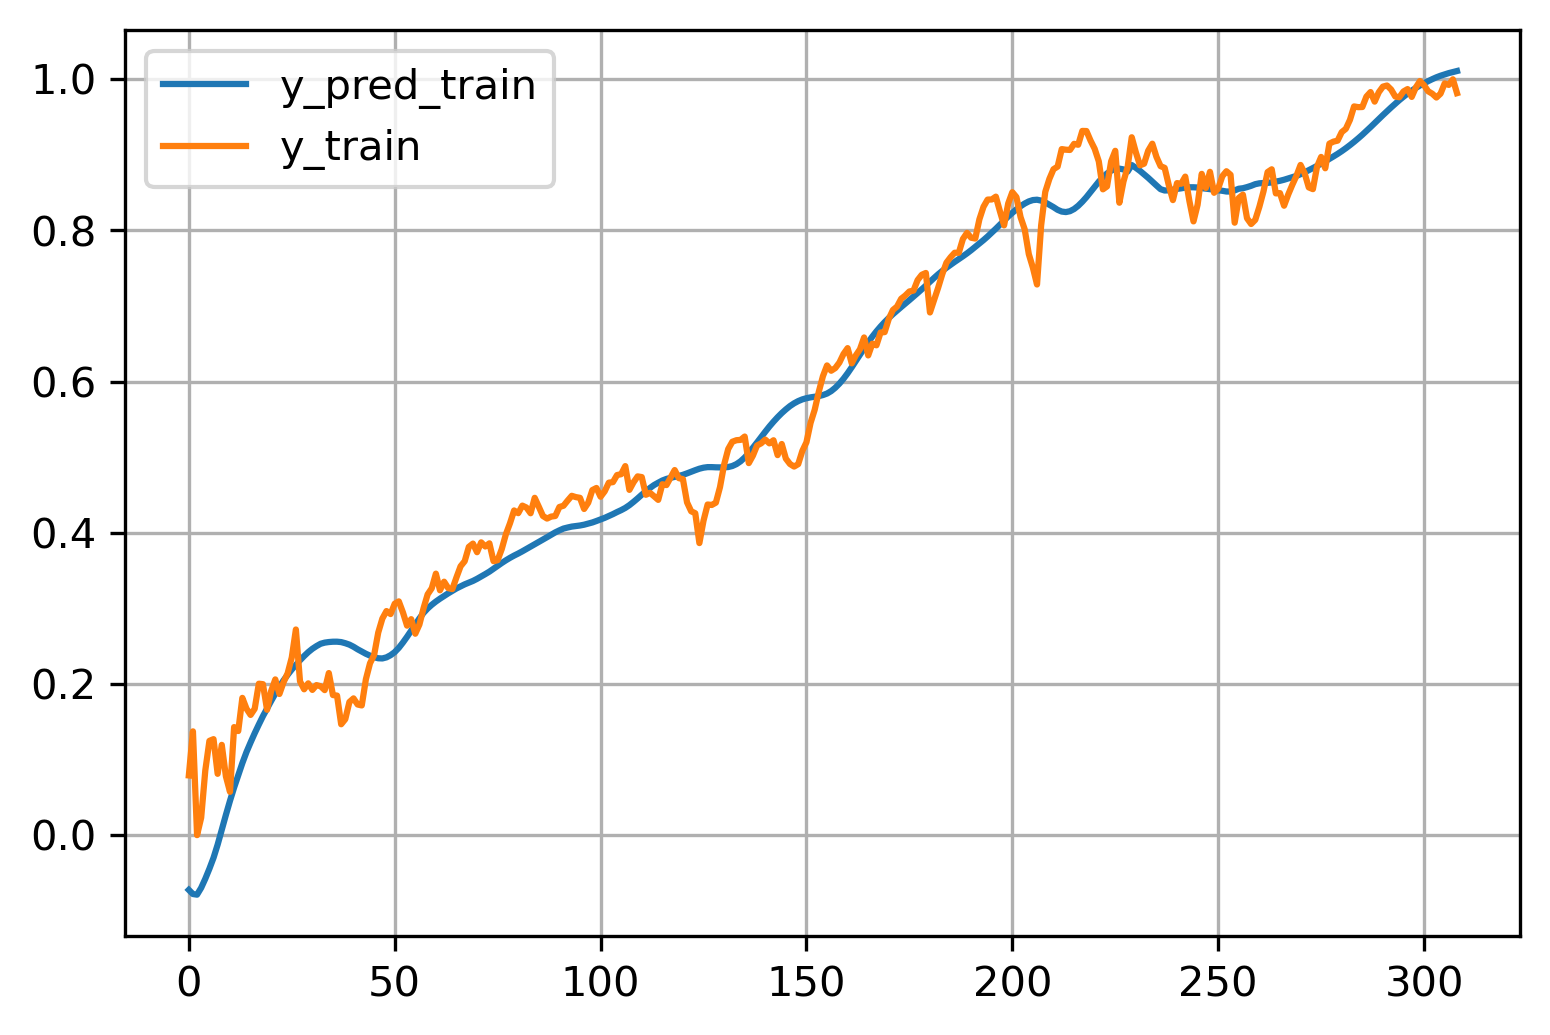

In [90]:
plt.plot(y_pred_train.flatten(), label='y_pred_train')
plt.plot(y_train_sc, label='y_train')
plt.legend()
plt.grid(True)

In [93]:
res_train = y_pred_train.flatten() - y_train_sc
res_train.shape

(309,)

In [94]:
residuals = []
residuals.extend(res_train)
residuals.extend(res_test)

In [95]:
len(residuals)

389

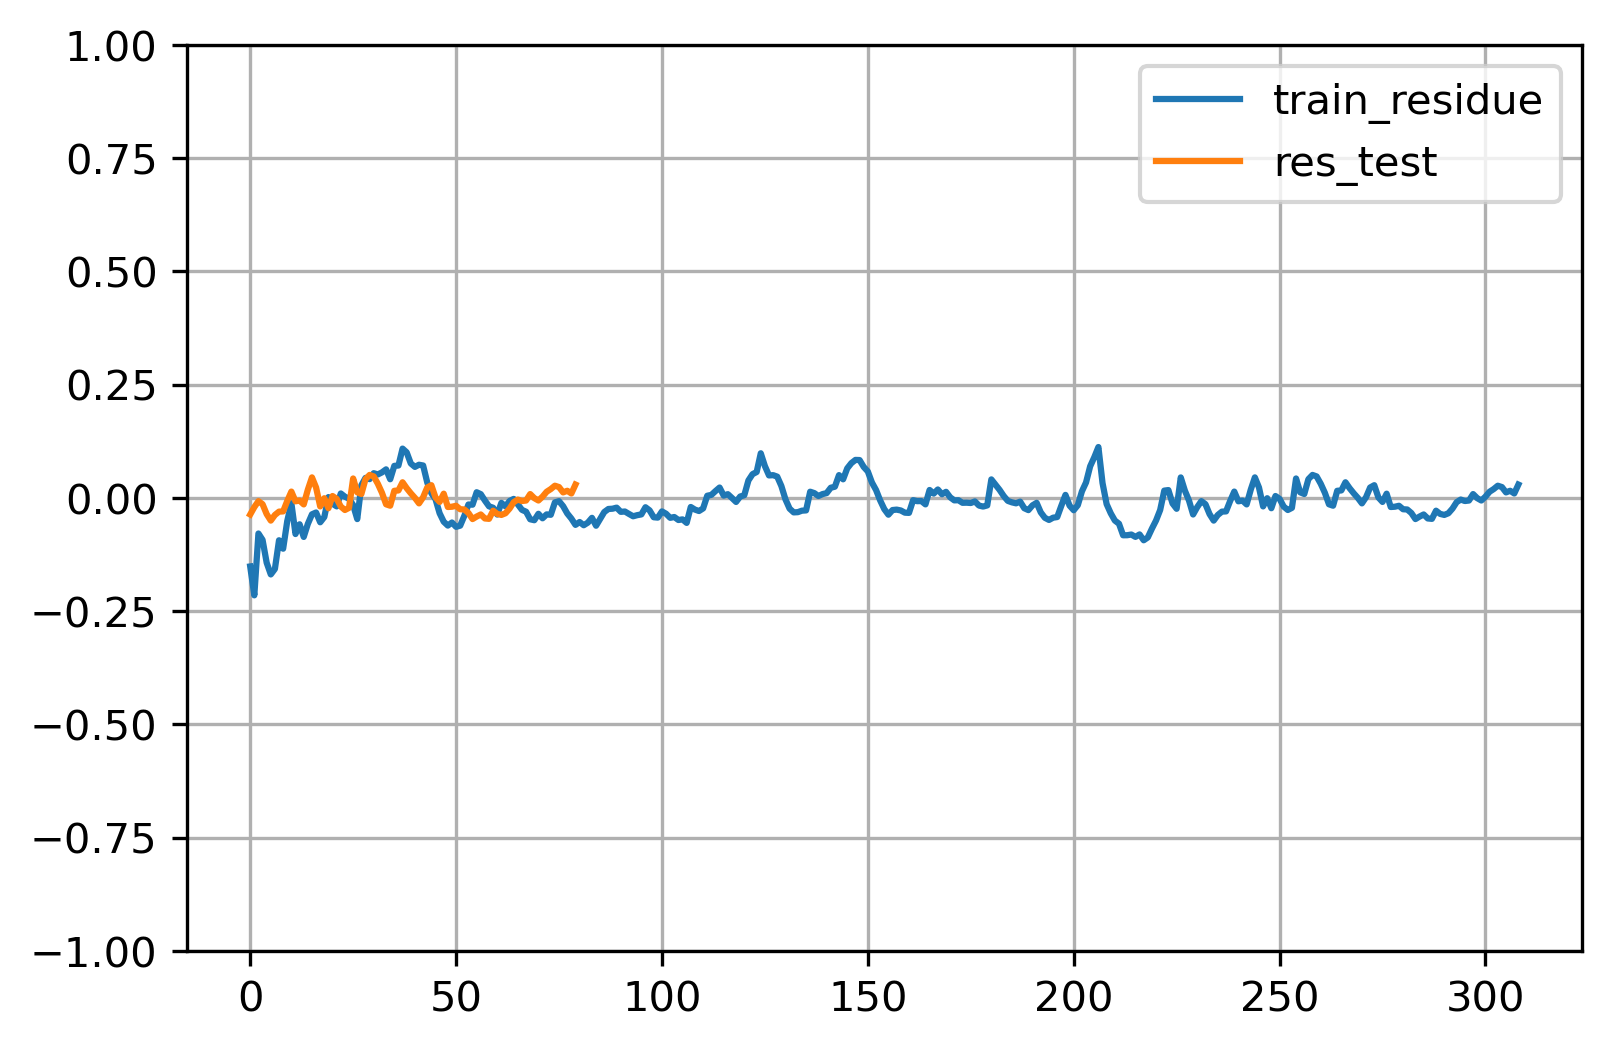

In [96]:
plt.plot(res_train, label='train_residue')
plt.plot(res_test, label='res_test')
plt.legend()
plt.ylim([-1, 1])
plt.grid(True)

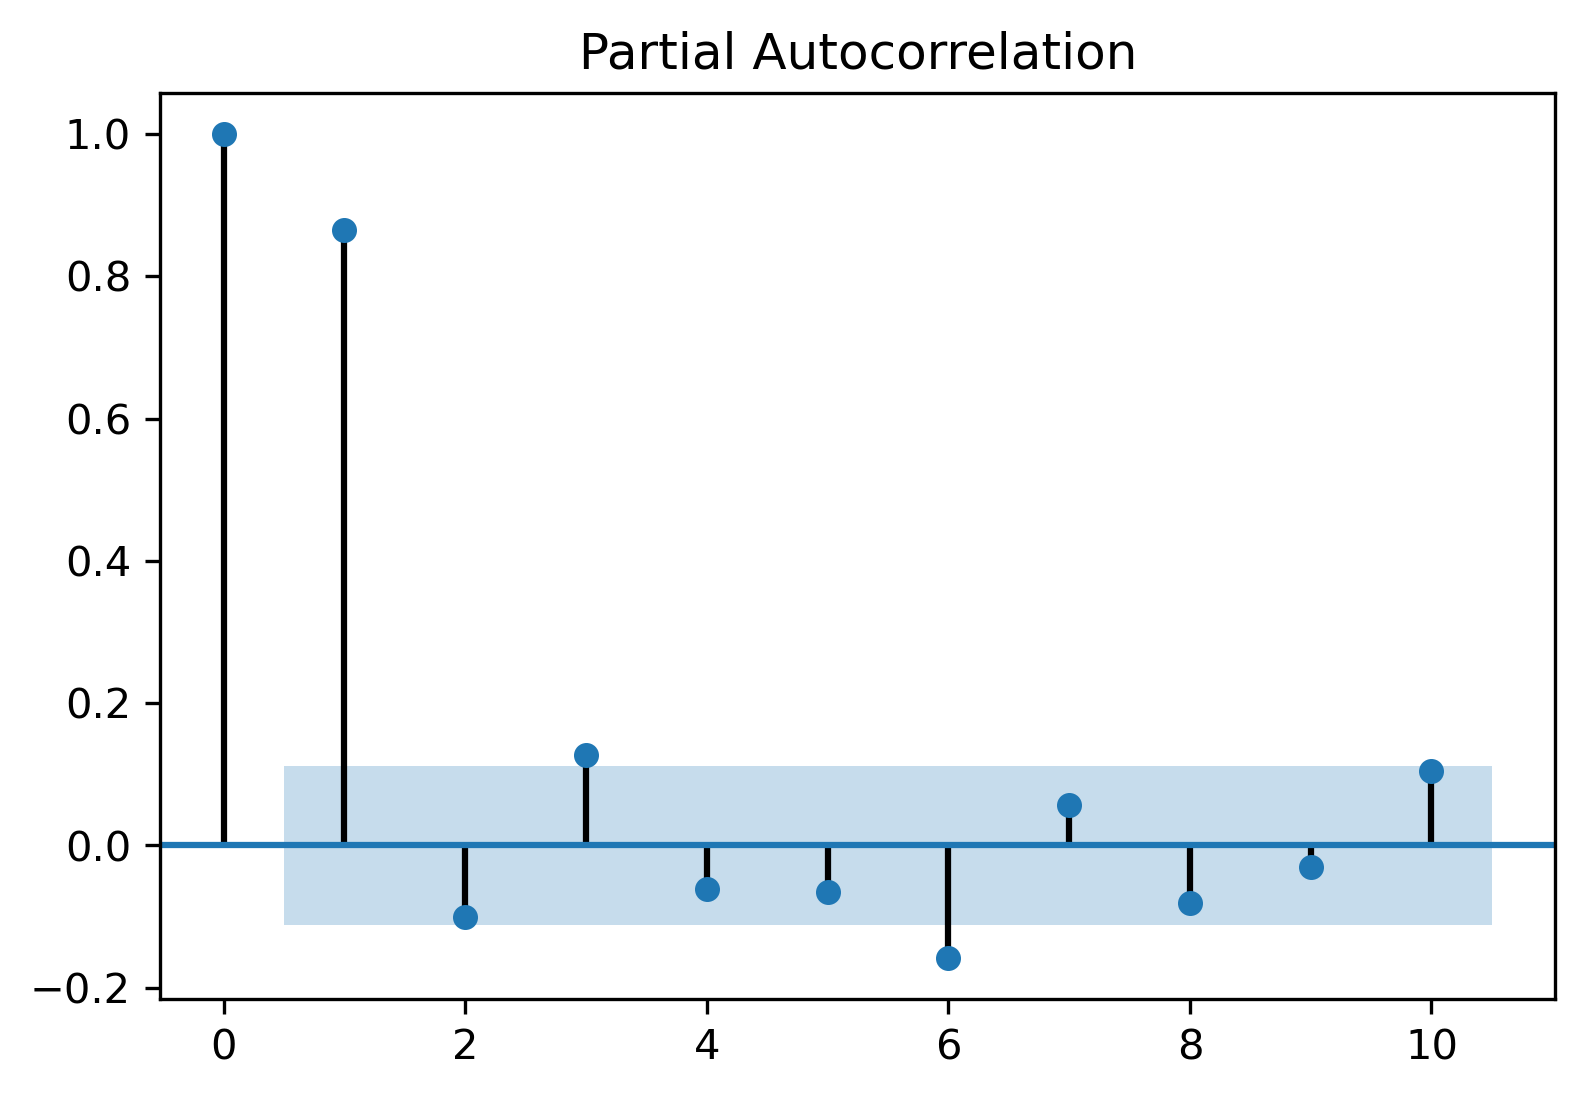

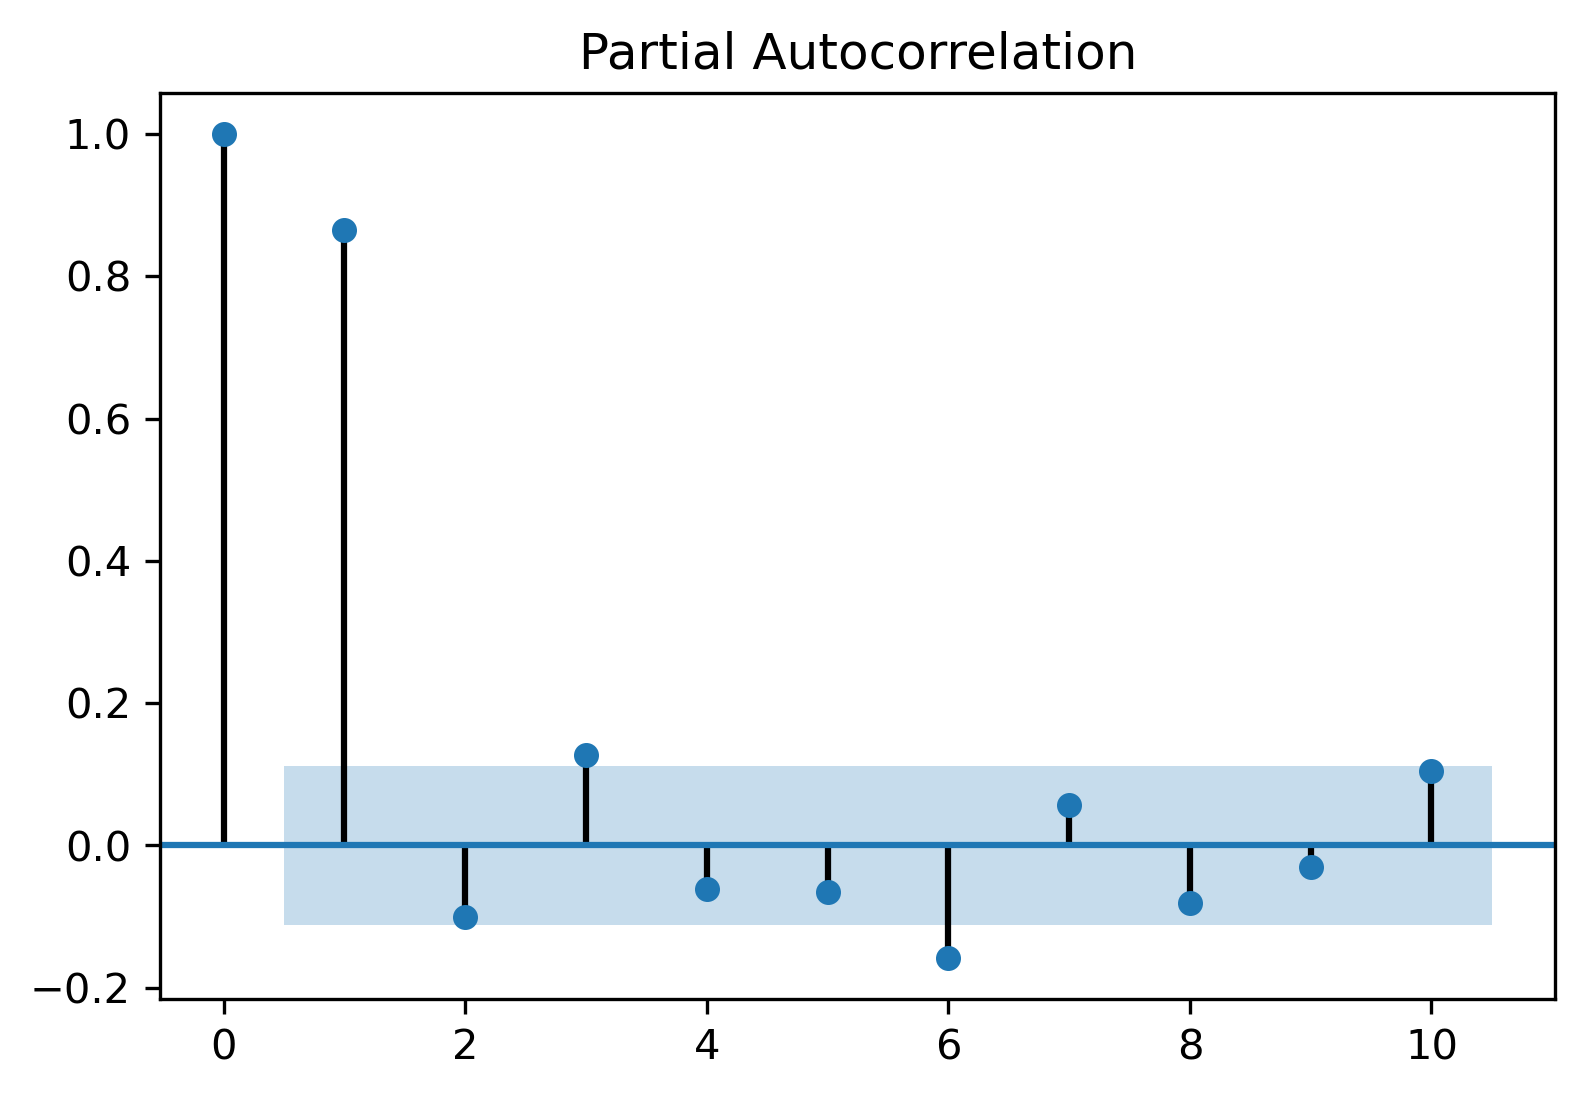

In [97]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(res_train,lags=10)

In [98]:
import pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [100]:
model = auto_arima(res_train,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1502.249, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1053.800, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1505.744, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1308.726, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1038.151, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1504.185, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1504.227, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1503.385, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1506.307, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1504.673, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1504.317, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1298.014, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1504.735, Time=0.14 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.280 seconds


In [101]:
model = ARIMA(res_train, order=(1,2,5))
model_fit = model.fit(disp=0)

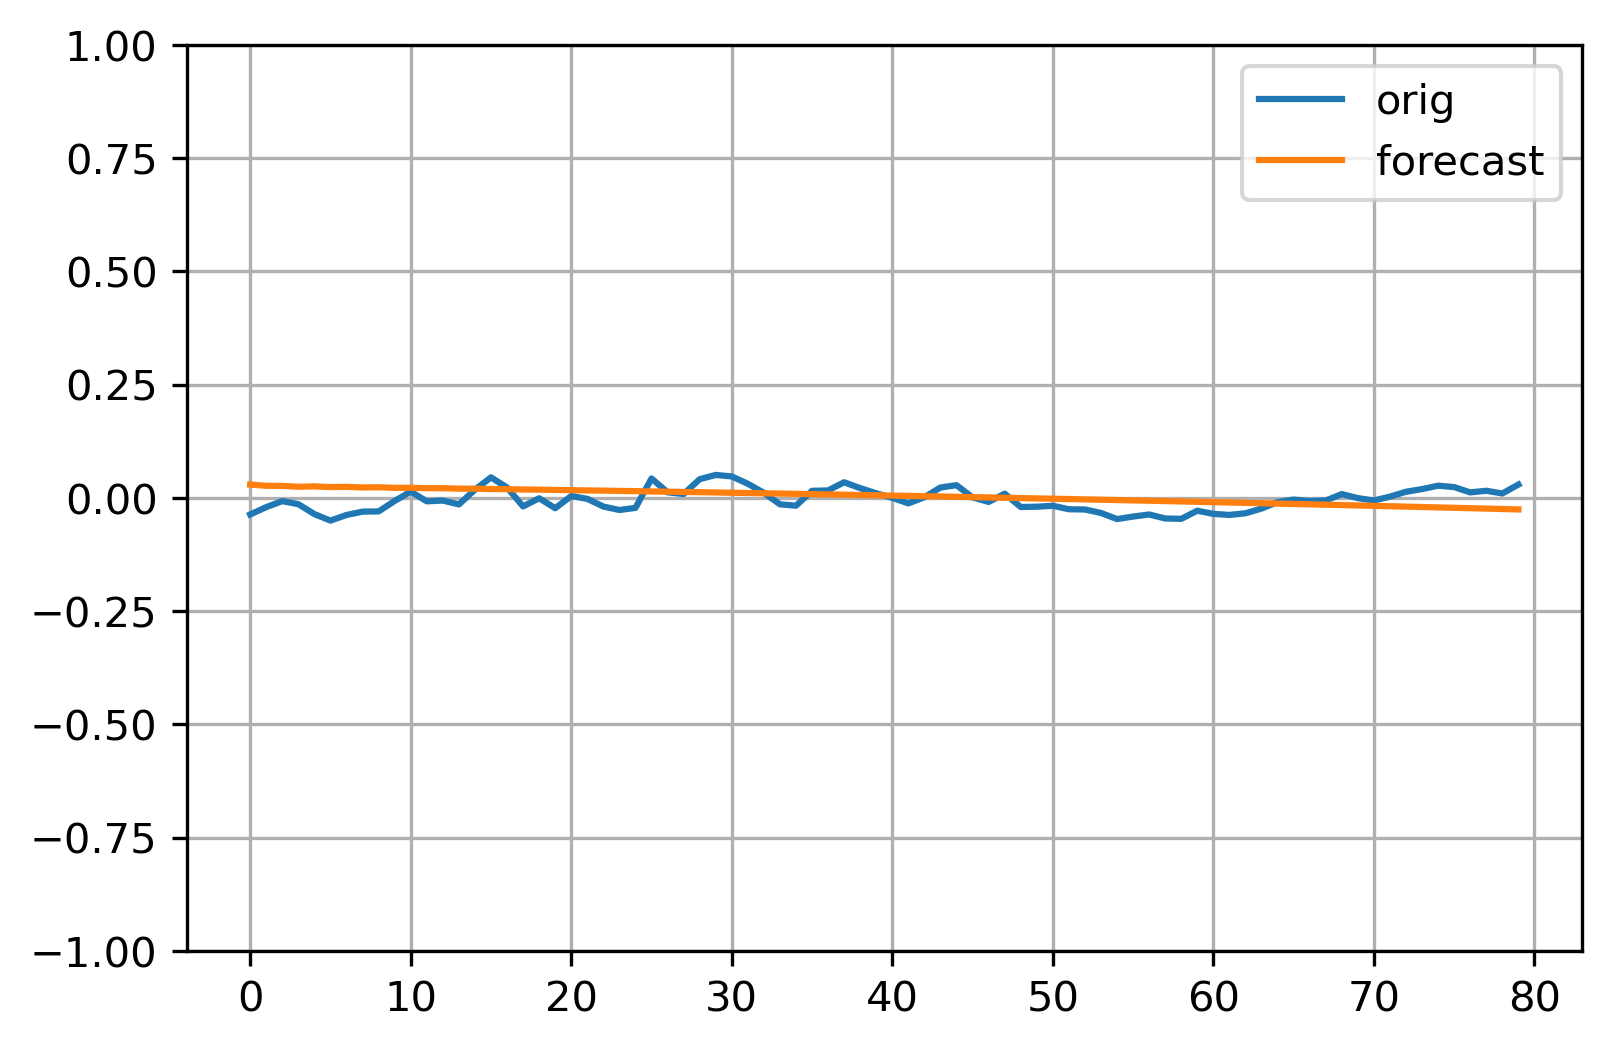

In [102]:
fc,se,conf = model_fit.forecast(80,alpha=0.01)
fc_series = pd.Series(fc)

plt.plot(res_test, label='orig')
plt.plot(fc_series, label='forecast')

plt.legend()
plt.ylim([-1, 1])
plt.grid(True)

In [148]:
fc1 = fc.reshape(fc.shape[0],1)

In [150]:
#pred_residue = res_sc.inverse_transform(fc)
#pred_residue = pred_residue.flatten()

In [112]:
history = residuals_scaled.tolist()[0:len(residuals_scaled)]
resid_test_pred = []
for t in range(len(res_test)):
    model = ARIMA(history, order=(9,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    resid_test_pred.append(res_test[t] - output[0])
    obs = res_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
pred_resid_flat = []
for i in resid_test_pred:
    pred_resid_flat.append(i[0])
    


predicted=0.549649, expected=-0.116873
predicted=-0.142350, expected=0.001664
predicted=-0.018793, expected=0.113011
predicted=0.074188, expected=0.093660
predicted=0.108285, expected=-0.023019
predicted=-0.155764, expected=-0.073318
predicted=0.104949, expected=0.075648
predicted=-0.013009, expected=0.189486
predicted=0.196627, expected=0.227898
predicted=0.196143, expected=0.406154
predicted=0.388107, expected=0.553290
predicted=0.539813, expected=0.385692
predicted=0.338819, expected=0.381152
predicted=0.337356, expected=0.282440
predicted=0.260995, expected=0.483909
predicted=0.411597, expected=0.649273
predicted=0.560759, expected=0.459491
predicted=0.452951, expected=0.128883
predicted=0.071839, expected=0.232144
predicted=0.258564, expected=0.049380
predicted=0.001701, expected=0.237110
predicted=0.161283, expected=0.194069
predicted=0.171358, expected=0.077957
predicted=0.118052, expected=0.038207
predicted=-0.023050, expected=0.087364
predicted=0.154724, expected=0.566300
pred

In [113]:
pred_resid_flat[0] = res_test[0]
pred_resid_flat

[-0.11687265365840899,
 0.1440138370861994,
 0.13180376977299982,
 0.019471552571352663,
 -0.13130417351398246,
 0.08244602053494982,
 -0.029300916764100224,
 0.20249441265750612,
 0.03127087553479599,
 0.21001142351242008,
 0.1651837680419333,
 -0.15412081496544838,
 0.04233326815371452,
 -0.054915878409787455,
 0.22291388872716772,
 0.2376760481657168,
 -0.10126812067114388,
 -0.32406743038446867,
 0.16030522388117743,
 -0.2091840078299531,
 0.23540865776074557,
 0.03278573187214534,
 -0.09340042083805253,
 -0.07984434670692626,
 0.11041345835359208,
 0.4115763732727228,
 -0.1236716727045789,
 -0.013751316666067048,
 0.264611883819374,
 0.08204922552077498,
 -0.058812114140045835,
 0.014171004968346612,
 -0.20898438713337336,
 -0.1693502492259,
 -0.0021490241310763852,
 0.2536688832305213,
 0.05642354514301798,
 0.16542957421686968,
 -0.05438477587470969,
 -0.07429247000292682,
 -0.06228710714959182,
 -0.01865922861427971,
 0.10318962494444736,
 0.25506103162899174,
 0.06856737422440

In [106]:
y_hybrid_pred =  y_pred_sc + fc_series
y_hybrid_pred.shape

(80,)

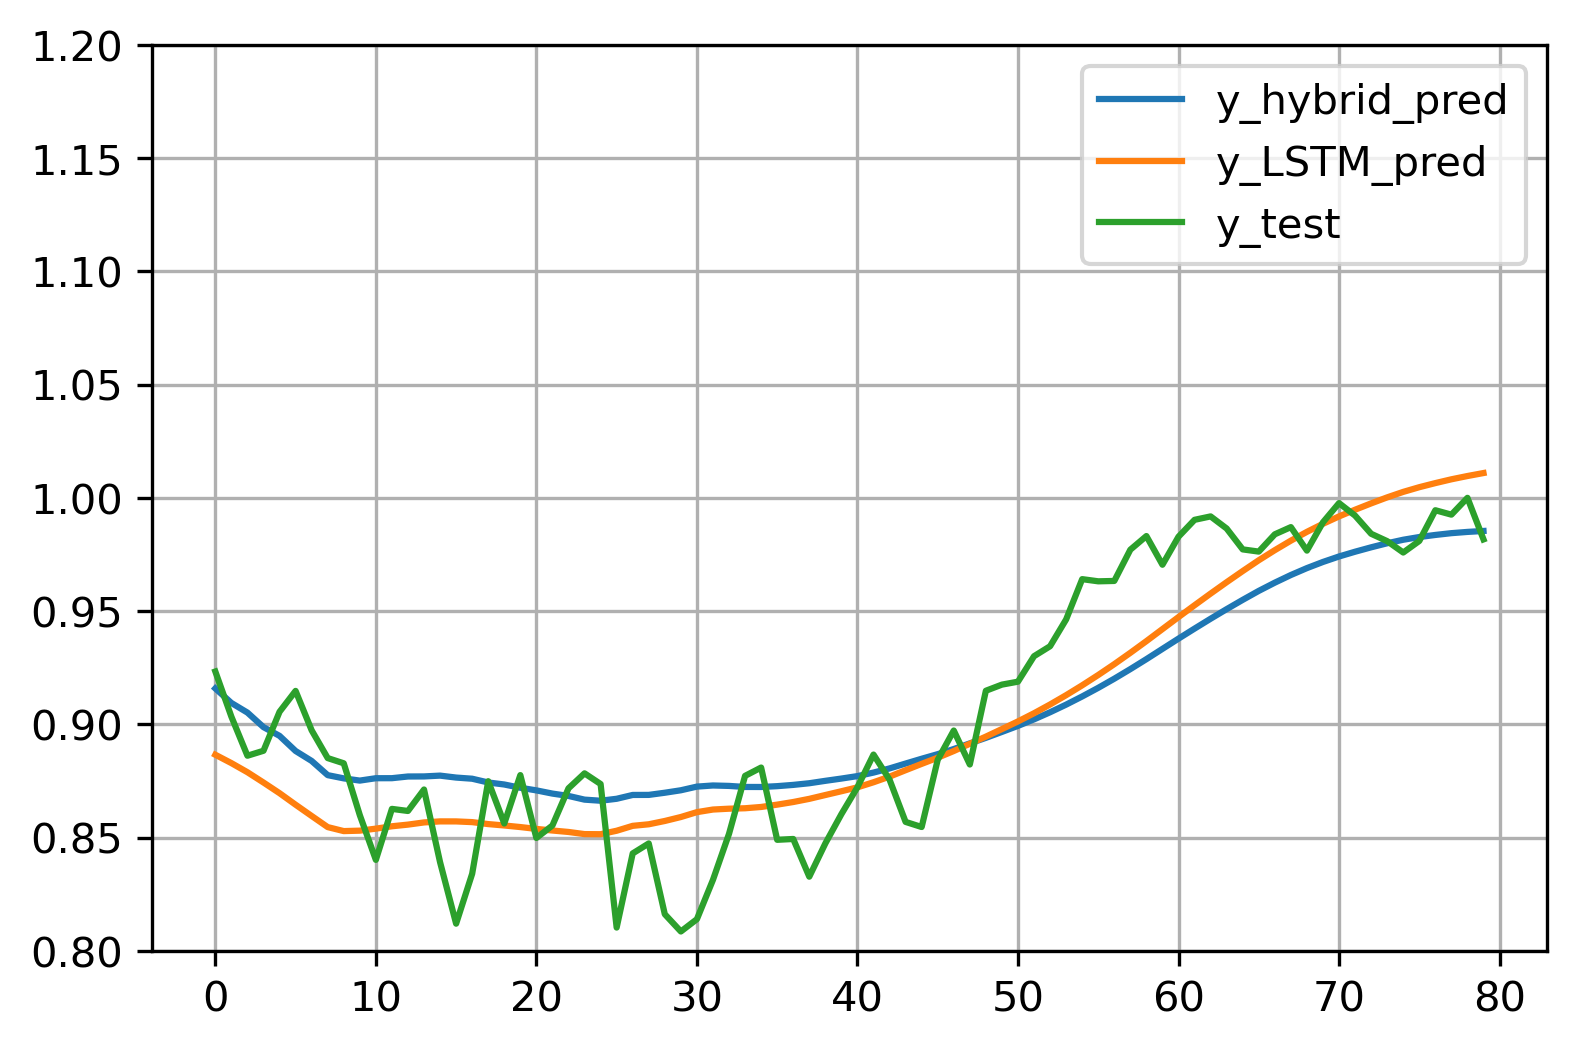

In [107]:
plt.plot(y_hybrid_pred, label='y_hybrid_pred')
plt.plot(y_pred_sc.flatten(), label='y_LSTM_pred')
plt.plot(y_test, label='y_test')
plt.legend()
plt.ylim([0.8, 1.2])
plt.grid(True)

In [109]:
error = mean_squared_error(y_test, y_pred_sc.flatten())
print('Test LSTM MSE: %.3f' % error)
error = mean_squared_error(y_test, y_hybrid_pred)
print('Test Hybrid MSE: %.3f' % error)

Test LSTM MSE: 0.001
Test Hybrid MSE: 0.001
